In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from teeplot import teeplot as tp
import numpy as np

# get data

In [2]:
df2 = pd.read_csv("data/K2/concat=100+replicate=1-100+ext=.csv")
df4 = pd.read_csv("data/K4/concat=100+replicate=1-100+ext=.csv")
df8 = pd.read_csv("data/K8/concat=100+replicate=1-100+ext=.csv")
df16 = pd.read_csv("data/K16/concat=100+replicate=1-100+ext=.csv")



# preprocess data

In [3]:
df2["k"] = 2
df4["k"] = 4
df8["k"] = 8
df16["k"] = 16

df = pd.concat([df2, df4, df8, df16])

# define teeplot functions

In [4]:
def logx_lineplot(*args, **kwargs):
    g = sns.lineplot(
        *args,
        **kwargs
    )
    g.set_xscale("log")
    plt.axhline(256, c="grey", linestyle="dotted", zorder=-1)
    y = np.array([16*i for i in range(17)])
    plt.yticks(y)
    # todo: change names here

# fitness over time

## process data

In [5]:
new_rows = []
for (replicate, k), filtered in df.groupby(["replicate", "k"]):
    max_update = filtered["update"].max()

    for update in range(max_update, 10000):
        new_rows.append({
            "update": update,
            "max_fitness": 256,
            "replicate": replicate,
            "k": k
        })

df = df.append(new_rows)
df

,update,mean_fitness,min_fitness,max_fitness,inferiority,replicate,k
0,0,46.316,0.0,256,0.180922,100,2
1,0,45.954,0.0,256,0.179508,10,2
2,0,47.909,0.0,256,0.187145,11,2
3,0,47.056,0.0,256,0.183812,12,2
4,0,47.067,0.0,256,0.183855,13,2
...,...,...,...,...,...,...,...
3842933,9995,NaN,NaN,256,NaN,100,16
3842934,9996,NaN,NaN,256,NaN,100,16
3842935,9997,NaN,NaN,256,NaN,100,16
3842936,9998,NaN,NaN,256,NaN,100,16


## graph results (ci: SD)

teeplots/ci=sd+hue=k+viz=logx-lineplot+x=update+y=max-fitness+ext=.pdf
teeplots/ci=sd+hue=k+viz=logx-lineplot+x=update+y=max-fitness+ext=.png


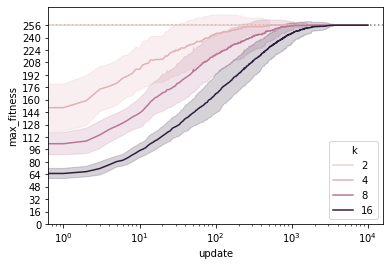

In [6]:
tp.tee(
    logx_lineplot,
    data=df,
    x="update",
    y="max_fitness",
    hue="k",
    ci="sd"
)

## graph results (ci: 95%)

In [7]:
data = df[np.log2(df["update"]+1) % 1.0 < 0.0001]
len(data)

5703

teeplots/hue=k+viz=logx-lineplot+x=update+y=max-fitness+ext=.pdf
teeplots/hue=k+viz=logx-lineplot+x=update+y=max-fitness+ext=.png


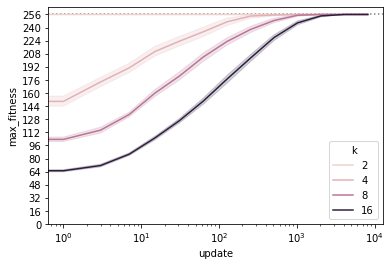

In [8]:
tp.tee(
    logx_lineplot,
    data=data,
    x="update",
    y="max_fitness",
    hue="k"
)

# time to solution over number of states (k)

### process data

In [9]:
box_df = df[df["max_fitness"] == 256]

res_df = []
for (replicate, k), filtered in box_df.groupby(["replicate", "k"]):
    sol_time = filtered["update"].min()

    res_df.append({
        "solution_time": sol_time,
        "replicate": replicate,
        "k": k
    })

res_df = df.from_records(res_df)

### graph

teeplots/viz=boxplot+x=k+y=solution-time+ext=.pdf
teeplots/viz=boxplot+x=k+y=solution-time+ext=.png


<AxesSubplot:xlabel='k', ylabel='solution_time'>

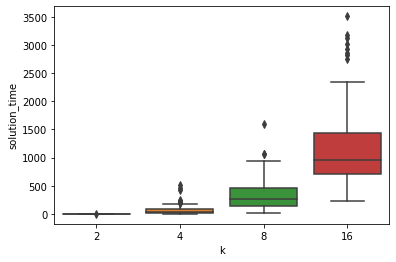

In [10]:
tp.tee(
    sns.boxplot,
    data=res_df,
    y="solution_time",
    x="k"
)

## time to solution (swarm plot)

In [11]:
def tee_swarmplot(*args, **kwargs):
    sns.swarmplot(
        linewidth=0.5,
        s=4,
        edgecolor='white',
        *args,
        **kwargs
    )
    sns.boxplot(
        *args,
        **kwargs
    )

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


teeplots/viz=tee-swarmplot+x=k+y=solution-time+ext=.pdf
teeplots/viz=tee-swarmplot+x=k+y=solution-time+ext=.png


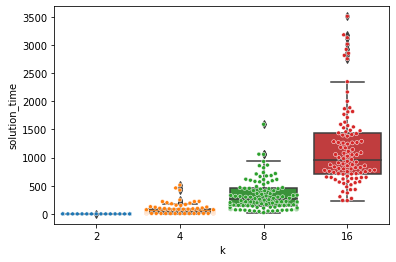

In [12]:
tp.tee(
    tee_swarmplot,
    data=res_df,
    x="k",
    y="solution_time"
)